# IIT 4316 Deep Learning<br>Homework #1: Multi-Layered Perceptron

In [29]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

## Utility functions

In [30]:
def sigmoid(x):
    ############################################################################
    # TODO: Implement Sigmoid activation
    ############################################################################

    return 1.0 / (1.0 + torch.exp(-x))

    ############################################################################
    # END TODO
    ############################################################################

    raise NotImplementedError("sigmoid not implemented")

def sigmoid_derivative(x):
    ############################################################################
    # TODO: Implement Sigmoid derivative
    ############################################################################

    return sigmoid(x) * (1 - sigmoid(x))

    ############################################################################
    # END TODO
    ############################################################################

    raise NotImplementedError("sigmoid_derivative not implemented")

def bce_loss(y_pred, y_true):
    ############################################################################
    # TODO: Implement Binary Cross Entropy Loss
    ############################################################################

    epsilon = 1e-12
    y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)
    loss = - (y_true * torch.log(y_pred) + (1.0 - y_true) * torch.log(1.0 - y_pred))
    return torch.mean(loss)

    ############################################################################
    # END TODO
    ############################################################################

    raise NotImplementedError("bce_loss not implemented")


# ==================== Test Utility Functions ====================
def test_utility_functions():
    """Test all utility functions with assertions"""
    print("Testing utility functions...")
    print("="*70)

    # Test Sigmoid
    x_test = torch.tensor([0.0])
    sigmoid_out = sigmoid(x_test)
    expected_sigmoid = torch.tensor([0.5])
    assert torch.allclose(sigmoid_out, expected_sigmoid, atol=1e-6), f"Sigmoid failed: expected {expected_sigmoid}, got {sigmoid_out}"

    x_test2 = torch.tensor([-100.0, 100.0])
    sigmoid_out2 = sigmoid(x_test2)
    assert sigmoid_out2[0] < 0.01 and sigmoid_out2[1] > 0.99, "Sigmoid boundary values incorrect"
    print("✓ Sigmoid implementation correct")

    # Test Sigmoid derivative
    x_test = torch.tensor([0.0])
    sigmoid_deriv = sigmoid_derivative(x_test)
    expected_sigmoid_deriv = torch.tensor([0.25])  # sigmoid(0) * (1 - sigmoid(0)) = 0.5 * 0.5
    assert torch.allclose(sigmoid_deriv, expected_sigmoid_deriv, atol=1e-6), f"Sigmoid derivative failed: expected {expected_sigmoid_deriv}, got {sigmoid_deriv}"
    print("✓ Sigmoid derivative implementation correct")

    # Test BCE Loss
    y_pred = torch.tensor([[0.9], [0.1], [0.8], [0.2]])
    y_true = torch.tensor([[1.0], [0.0], [1.0], [0.0]])
    loss = bce_loss(y_pred, y_true)
    assert loss > 0, "BCE loss should be positive"
    assert not torch.isnan(loss), "BCE loss contains NaN"

    # Perfect prediction should give near-zero loss
    y_pred_perfect = torch.tensor([[0.9999], [0.0001], [0.9999], [0.0001]])
    loss_perfect = bce_loss(y_pred_perfect, y_true)
    assert loss_perfect < 0.01, f"BCE loss for near-perfect prediction should be close to 0, got {loss_perfect}"
    print("✓ BCE Loss implementation correct")

    print("="*70)
    print("All utility functions passed!\n")

test_utility_functions()

Testing utility functions...
✓ Sigmoid implementation correct
✓ Sigmoid derivative implementation correct
✓ BCE Loss implementation correct
All utility functions passed!



## MLP Class

In [31]:
class MLP:
    def __init__(self, initial_weights=None):
        if initial_weights is None:
            self.W1 = torch.randn(2, 2, requires_grad=False)
            self.B1 = torch.randn(2, requires_grad=False)
            self.W2 = torch.randn(2, 1, requires_grad=False)
            self.B2 = torch.randn(1, requires_grad=False)
        else:
            self.W1 = initial_weights['W1'].clone()
            self.B1 = initial_weights['B1'].clone()
            self.W2 = initial_weights['W2'].clone()
            self.B2 = initial_weights['B2'].clone()

        # Store intermediate values for backward pass
        self.X = None
        self.Z1 = None
        self.H1 = None
        self.Z2 = None
        self.Y_pred = None

    def forward(self, X):
        """
        Forward pass

        Args:
            X: (N, 2) input tensor

        Returns:
            Y_pred: (N, 1) output probabilities after sigmoid
        """

        ########################################################################
        # TODO: Implement forward pass
        #
        # Save intermediate values for convenience & backward pass
        #  - self.X: input 
        #  - self.Z1: input to the sigmoid in the hidden layer
        #  - self.H1: output of the sigmoid in the hidden layer
        #  - self.Z2: input to the sigmoid in the output layer
        #  - self.Y_pred: output of the sigmoid in the output layer (=final output)
        ########################################################################

        self.X = X

        self.Z1 = torch.matmul(X, self.W1) + self.B1
        self.H1 = sigmoid(self.Z1)
        self.Z2 = torch.matmul(self.H1, self.W2) + self.B2
        self.Y_pred = sigmoid(self.Z2)
        self.Y_pred = torch.tensor(self.Y_pred, dtype=torch.float32)
        
        ########################################################################
        # END TODO
        ########################################################################

        assert self.X is not None, "X not saved during forward pass"
        assert self.Z1 is not None, "Z1 not saved during forward pass"
        assert self.H1 is not None, "H1 not saved during forward pass"
        assert self.Z2 is not None, "Z2 not saved during forward pass"
        assert self.Y_pred is not None, "Y_pred not saved during forward pass"

        return self.Y_pred

        raise NotImplementedError("forward not implemented")

    def backward(self, Y_true):
        """
        Backward pass - compute gradients manually

        Args:
            Y_true: (N, 1) true labels

        Returns:
            gradients: dict with keys 'W1_12', 'W1_21'
        """
        N = self.X.shape[0]

        ########################################################################
        # TODO: Compute gradients manually using chain rule
        #
        # Goal: Compute the gradients of the BCE loss with respect to W1_12 and W1_21, stored as dL_dW1_12 and dL_dW1_21
        ########################################################################

        delta2 = (self.Y_pred - Y_true) / N
        dL_dH1 = torch.matmul(delta2, self.W2.T)
        sigma_prime_Z1 = sigmoid_derivative(self.Z1)
        delta1 = dL_dH1 * sigma_prime_Z1
        dL_dW1 = torch.matmul(self.X.T, delta1)
        dL_dW1_12 = dL_dW1[0, 1]
        dL_dW1_21 = dL_dW1[1, 0]

        ########################################################################
        # END TODO
        ########################################################################

        assert dL_dW1_12 is not None, "dL_dW1_12 not computed"
        assert dL_dW1_21 is not None, "dL_dW1_21 not computed"

        return {
            'W1_12': dL_dW1_12,
            'W1_21': dL_dW1_21
        }

## Train function

In [32]:
def train(mlp, X, Y, optimizer='sgd', lr=0.1, epochs=1000, beta1=0.9, beta2=0.999):
    """
    Train the MLP using manual gradient computation

    Args:
        mlp: MLP instance
        X: (N, 2) input data
        Y: (N, 1) or (N,) true labels
        optimizer: 'sgd' or 'adam'
        lr: learning rate
        epochs: number of training epochs
        beta1: Adam parameter (momentum)
        beta2: Adam parameter (RMSprop)

    Returns:
        history: dict with 'W1', 'B1', 'W2', 'B2', 'loss' lists
    """
    # Ensure Y is (N, 1)
    if Y.dim() == 1:
        Y = Y.unsqueeze(1)

    # Initialize history
    history = {
        'W1': [mlp.W1.clone()],
        'B1': [mlp.B1.clone()],
        'W2': [mlp.W2.clone()],
        'B2': [mlp.B2.clone()],
        'loss': []
    }

    # Initialize Adam parameters
    if optimizer == 'adam':
        m = {'W1_12': torch.tensor(0.0),
             'W1_21': torch.tensor(0.0)}

        v = {'W1_12': torch.tensor(0.0),
             'W1_21': torch.tensor(0.0)}

        epsilon = 1e-8

    # Training loop
    for epoch in range(epochs):
        # Forward pass
        Y_pred = mlp.forward(X)

        # Compute loss
        loss = bce_loss(Y_pred, Y)
        history['loss'].append(loss.item())

        # Backward pass
        gradients = mlp.backward(Y)

        # Update weights
        if optimizer == 'sgd':
            ####################################################################
            # TODO: Implement SGD optimizer
            #
            # Assign new weights to W1_12, W1_21
            ####################################################################

            W1_12 = mlp.W1[0, 1] - lr * gradients['W1_12']
            W1_21 = mlp.W1[1, 0] - lr * gradients['W1_21']

            ####################################################################
            # END TODO
            ####################################################################

            assert W1_12 is not None, "W1_12 not computed"
            assert W1_21 is not None, "W1_21 not computed"

            mlp.W1[0, 1] = W1_12
            mlp.W1[1, 0] = W1_21

        elif optimizer == 'adam':
            ####################################################################
            # TODO: Implement Adam optimizer
            #
            # Assign new weights to W1_12, W1_21
            ####################################################################

            # Adam step for W1_12
            g_W1_12 = gradients['W1_12']
            m['W1_12'] = beta1 * m['W1_12'] + (1.0 - beta1) * g_W1_12
            v['W1_12'] = beta2 * v['W1_12'] + (1.0 - beta2) * g_W1_12**2
            
            m_hat_W1_12 = m['W1_12'] / (1.0 - beta1**(epoch + 1))
            v_hat_W1_12 = v['W1_12'] / (1.0 - beta2**(epoch + 1))
            
            W1_12 = mlp.W1[0, 1] - lr * m_hat_W1_12 / (torch.sqrt(v_hat_W1_12) + epsilon)

            # Adam step for W1_21
            g_W1_21 = gradients['W1_21']
            m['W1_21'] = beta1 * m['W1_21'] + (1.0 - beta1) * g_W1_21
            v['W1_21'] = beta2 * v['W1_21'] + (1.0 - beta2) * g_W1_21**2
            
            m_hat_W1_21 = m['W1_21'] / (1.0 - beta1**(epoch + 1))
            v_hat_W1_21 = v['W1_21'] / (1.0 - beta2**(epoch + 1))
            
            W1_21 = mlp.W1[1, 0] - lr * m_hat_W1_21 / (torch.sqrt(v_hat_W1_21) + epsilon)
            

            ####################################################################
            # END TODO
            ####################################################################

            assert W1_12 is not None, "W1_12 not computed"
            assert W1_21 is not None, "W1_21 not computed"

            mlp.W1[0, 1] = W1_12
            mlp.W1[1, 0] = W1_21

        # Store weights history
        history['W1'].append(mlp.W1.clone())
        history['B1'].append(mlp.B1.clone())
        history['W2'].append(mlp.W2.clone())
        history['B2'].append(mlp.B2.clone())

    return history

## Plotting function

In [33]:
def plot_loss_landscape(mlp_initial, trajectories, loss_trajectories, labels):

    # Extract all W1[0,1] and W1[1,0] trajectories
    all_w01_trajs = []
    all_w10_trajs = []

    for weight_trajectory in trajectories:
        if isinstance(weight_trajectory[0], dict):
            w01_traj = [w['W1'][0, 1].item() for w in weight_trajectory]
            w10_traj = [w['W1'][1, 0].item() for w in weight_trajectory]
        else:
            w01_traj = [w[0][0, 1].item() for w in weight_trajectory]
            w10_traj = [w[0][1, 0].item() for w in weight_trajectory]

        all_w01_trajs.append(w01_traj)
        all_w10_trajs.append(w10_traj)

    # Use the first trajectory's final values as center
    w01_final = all_w01_trajs[0][-1]
    w10_final = all_w10_trajs[0][-1]

    # Calculate grid limits considering all trajectories
    w01_dist = max(abs(w - w01_final) for traj in all_w01_trajs for w in traj)
    w10_dist = max(abs(w - w10_final) for traj in all_w10_trajs for w in traj)

    w01_range = w01_dist * 1.2
    w10_range = w10_dist * 1.2

    w01_min, w01_max = w01_final - w01_range, w01_final + w01_range
    w10_min, w10_max = w10_final - w10_range, w10_final + w10_range

    # Create grid
    w01_grid = np.linspace(w01_min, w01_max, 100)
    w10_grid = np.linspace(w10_min, w10_max, 100)
    W01_mesh, W10_mesh = np.meshgrid(w01_grid, w10_grid)

    # Compute loss for each grid point
    Loss_mesh = np.zeros_like(W01_mesh)

    for i in range(W01_mesh.shape[0]):
        for j in range(W01_mesh.shape[1]):
            # Create temporary MLP with modified weights
            temp_mlp = MLP()
            # Use final weights from first trajectory as base
            final_weights = trajectories[0][-1]
            temp_mlp.W1 = final_weights['W1'].clone()
            temp_mlp.B1 = final_weights['B1'].clone()
            temp_mlp.W2 = final_weights['W2'].clone()
            temp_mlp.B2 = final_weights['B2'].clone()

            # Modify only W1[0,1] and W1[1,0]
            temp_mlp.W1[0, 1] = W01_mesh[i, j]
            temp_mlp.W1[1, 0] = W10_mesh[i, j]

            # Forward pass
            Y_pred = temp_mlp.forward(torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]]))
            loss = bce_loss(Y_pred, torch.tensor([[0.], [1.], [1.], [0.]]))
            Loss_mesh[i, j] = loss.item()

    # Plot
    fig, ax = plt.subplots(figsize=(12, 9))

    # Contour plot
    contour = ax.contourf(W01_mesh, W10_mesh, Loss_mesh, levels=20, cmap='viridis', alpha=0.7)
    ax.contour(W01_mesh, W10_mesh, Loss_mesh, levels=20, colors='black', alpha=0.2, linewidths=0.5)

    # Plot all trajectories
    colors = ['red', 'blue', 'green', 'orange', 'purple']

    for idx, (w01_traj, w10_traj, label) in enumerate(zip(all_w01_trajs, all_w10_trajs, labels)):
        color = colors[idx % len(colors)]
        ax.plot(w01_traj, w10_traj, '.-', color=color, linewidth=2, markersize=3,
                label=f'{label} Trajectory', alpha=0.8)
        ax.plot(w01_traj[-1], w10_traj[-1], '*', color=color, markersize=15,
                label=f'{label} End')

    # Mark initial point (same for all)
    ax.plot(all_w01_trajs[0][0], all_w10_trajs[0][0], 'ko', markersize=12,
            label='Initial Point', zorder=10)

    # Labels and legend
    ax.set_xlabel('W1[0, 1]', fontsize=12)
    ax.set_ylabel('W1[1, 0]', fontsize=12)
    ax.set_title('Loss Landscape and Training Trajectories', fontsize=14)
    ax.legend(loc='best')

    # Colorbar
    cbar = plt.colorbar(contour, ax=ax)
    cbar.set_label('Loss', fontsize=12)

    plt.tight_layout()
    plt.show()

## Run

✓ XOR dataset correctly defined

✓ Initial weights correctly defined

Initial Weights:
W1:
tensor([[ 7.,  0.],
        [ 0., 10.]])
B1: tensor([-11.,  -5.])
W2:
tensor([[-13.],
        [ 12.]])
B2: tensor([-6.])

Training with SGD...
Final loss (SGD): 0.0117

Predictions after SGD:
  Input: [0. 0.], True: 0, Pred: 0.0027
  Input: [0. 1.], True: 1, Pred: 0.9972
  Input: [1. 0.], True: 1, Pred: 0.9688
  Input: [1. 1.], True: 0, Pred: 0.0095

Training with Adam...


C:\Users\김명재\AppData\Local\Temp\ipykernel_5900\386668716.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.Y_pred = torch.tensor(self.Y_pred, dtype=torch.float32)


Final loss (Adam): 0.0032

Predictions after Adam:
  Input: [0. 0.], True: 0, Pred: 0.0027
  Input: [0. 1.], True: 1, Pred: 0.9969
  Input: [1. 0.], True: 1, Pred: 0.9952
  Input: [1. 1.], True: 0, Pred: 0.0022

Plotting loss landscape...


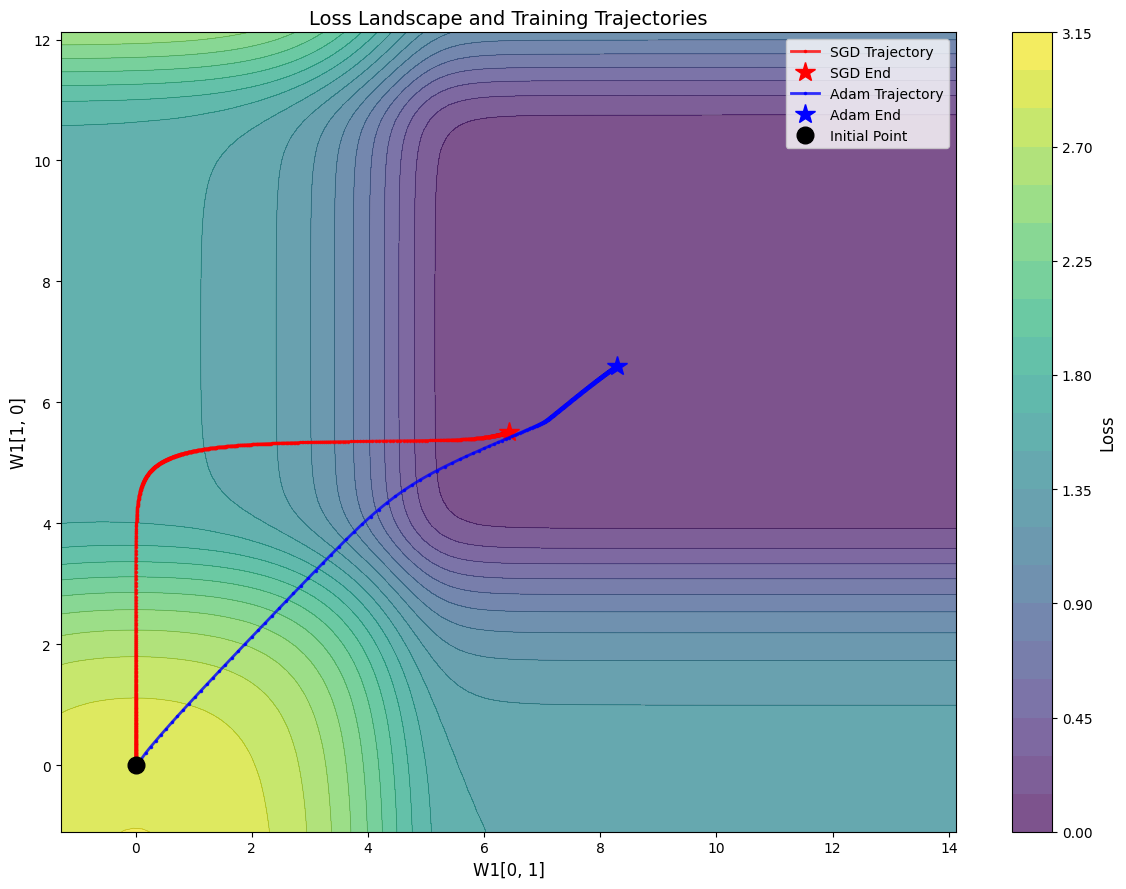

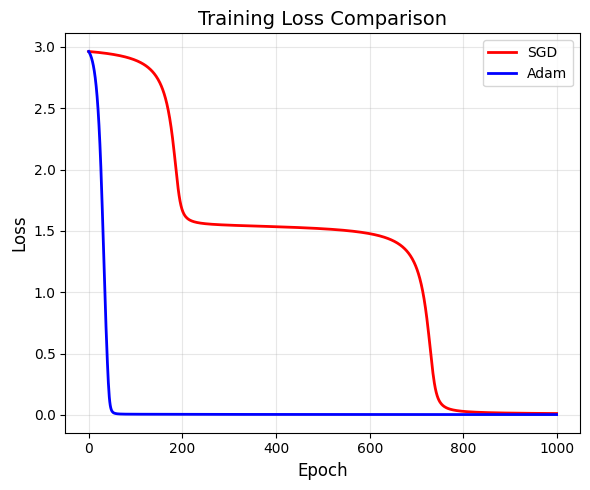

In [52]:
############################################################################
# TODO: Define XOR dataset
#
# Create X_train as a (4, 2) tensor with XOR inputs
#
# Create Y_train as a (4,) tensor with XOR targets
############################################################################

X_train = torch.tensor([[0.0, 0.0],
                       [0.0, 1.0],
                       [1.0, 0.0],
                       [1.0, 1.0]], dtype=torch.float32)

Y_train = torch.tensor([0.0, 1.0, 1.0, 0.0], dtype=torch.float32)

############################################################################
# END TODO
############################################################################

# Assertions to check XOR dataset
assert X_train is not None, "X_train not defined"
assert Y_train is not None, "Y_train not defined"
assert X_train.shape == (4, 2), f"X_train shape should be (4, 2), got {X_train.shape}"
assert Y_train.shape == (4,), f"Y_train shape should be (4,), got {Y_train.shape}"
print("✓ XOR dataset correctly defined\n")


############################################################################
# TODO: Initialize weights
#
# Create initial_weights dictionary with given weights:
# - 'W1': (2, 2) tensor
# - 'B1': (2,) tensor
# - 'W2': (2, 1) tensor
# - 'B2': (1,) tensor
############################################################################

initial_weights = {
    'W1': torch.tensor([[7.0, 0.0], [0.0, 10.0]], dtype=torch.float32),
    'B1': torch.tensor([-11.0, -5.0]),
    'W2': torch.tensor([[-13.0], [12.0]], dtype=torch.float32),
    'B2': torch.tensor([-6.0], dtype=torch.float32)
}

############################################################################
# END TODO
############################################################################

# Assertions to check initial weights
assert initial_weights is not None, "initial_weights not defined"
assert 'W1' in initial_weights and initial_weights['W1'].shape == (2, 2), "W1 shape should be (2, 2)"
assert 'B1' in initial_weights and initial_weights['B1'].shape == (2,), "B1 shape should be (2,)"
assert 'W2' in initial_weights and initial_weights['W2'].shape == (2, 1), "W2 shape should be (2, 1)"
assert 'B2' in initial_weights and initial_weights['B2'].shape == (1,), "B2 shape should be (1,)"
print("✓ Initial weights correctly defined")

print("\nInitial Weights:")
print(f"W1:\n{initial_weights['W1']}")
print(f"B1: {initial_weights['B1']}")
print(f"W2:\n{initial_weights['W2']}")
print(f"B2: {initial_weights['B2']}\n")

# Train with SGD
print("Training with SGD...")
mlp_sgd = MLP(initial_weights)
####################################################################
# TODO: Set appropriate learning rate and number of epochs below
####################################################################
history_sgd = train(mlp_sgd, X_train, Y_train, optimizer='sgd', lr=0.1, epochs=1000)
####################################################################
# END TODO
####################################################################
print(f"Final loss (SGD): {history_sgd['loss'][-1]:.4f}")

# Test predictions
Y_pred_sgd = mlp_sgd.forward(X_train)
print("\nPredictions after SGD:")
for i, (x, y_true, y_pred) in enumerate(zip(X_train, Y_train, Y_pred_sgd)):
    print(f"  Input: {x.numpy()}, True: {y_true:.0f}, Pred: {y_pred.item():.4f}")

# Train with Adam
print("\nTraining with Adam...")
mlp_adam = MLP(initial_weights)
####################################################################
# TODO: Set appropriate learning rate and number of epochs below
####################################################################
history_adam = train(mlp_adam, X_train, Y_train, optimizer='adam', lr=0.1, epochs=1000)
####################################################################
# END TODO
####################################################################
print(f"Final loss (Adam): {history_adam['loss'][-1]:.4f}")

# Test predictions
Y_pred_adam = mlp_adam.forward(X_train)
print("\nPredictions after Adam:")
for i, (x, y_true, y_pred) in enumerate(zip(X_train, Y_train, Y_pred_adam)):
    print(f"  Input: {x.numpy()}, True: {y_true:.0f}, Pred: {y_pred.item():.4f}")

# Prepare data for plotting
weight_traj_sgd = [{'W1': history_sgd['W1'][i],
                    'B1': history_sgd['B1'][i],
                    'W2': history_sgd['W2'][i],
                    'B2': history_sgd['B2'][i]}
                    for i in range(len(history_sgd['loss']))]

weight_traj_adam = [{'W1': history_adam['W1'][i],
                      'B1': history_adam['B1'][i],
                      'W2': history_adam['W2'][i],
                      'B2': history_adam['B2'][i]}
                    for i in range(len(history_adam['loss']))]

# Plot loss landscape with both trajectories
print("\nPlotting loss landscape...")
plot_loss_landscape(
    mlp_sgd,
    trajectories=[weight_traj_sgd, weight_traj_adam],
    loss_trajectories=[history_sgd['loss'], history_adam['loss']],
    labels=['SGD', 'Adam']
)

# Plot loss curves
plt.figure(figsize=(6, 5))

plt.plot(history_sgd['loss'], label='SGD', color='red', linewidth=2)
plt.plot(history_adam['loss'], label='Adam', color='blue', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Loss Comparison', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()